now working /home/ken/src/github.com/endaaman/bt



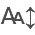

In [1]:
import os
import re
import sys

import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics as skmetrics
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.font_manager import fontManager
from IPython.display import display
from ipywidgets import interact, FloatSlider
from umap import UMAP
from sklearn.decomposition import PCA
import ipynbname
from endaaman.ml import fix_global_seed
from itables import init_notebook_mode
# from ydata_profiling import ProfileReport

project_root = os.path.abspath(os.path.join(os.path.dirname(ipynbname.path()), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
os.chdir(project_root)
print('now working', project_root)

DPI = 300

sns.set_theme(style="ticks", palette="tab10")
# sns.set_theme(style="white")
# plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['font.family'] = 'Verdana'
plt.rcParams['font.size'] = 10  
plt.rcParams['axes.labelsize'] = 12  
plt.rcParams['axes.titlesize'] = 14  
plt.rcParams['xtick.labelsize'] = 10  
plt.rcParams['ytick.labelsize'] = 10 
plt.rcParams['figure.dpi'] = DPI

os.makedirs('out/figs', exist_ok=True)

fix_global_seed()

init_notebook_mode(all_interactive=True)
# print(f"デフォルトのフォント: {plt.rcParams['font.sans-serif']}")
# print(', '.join(sorted(list(set([font.name for font in fontManager.ttflist if not font.name.startswith('Noto')])))))

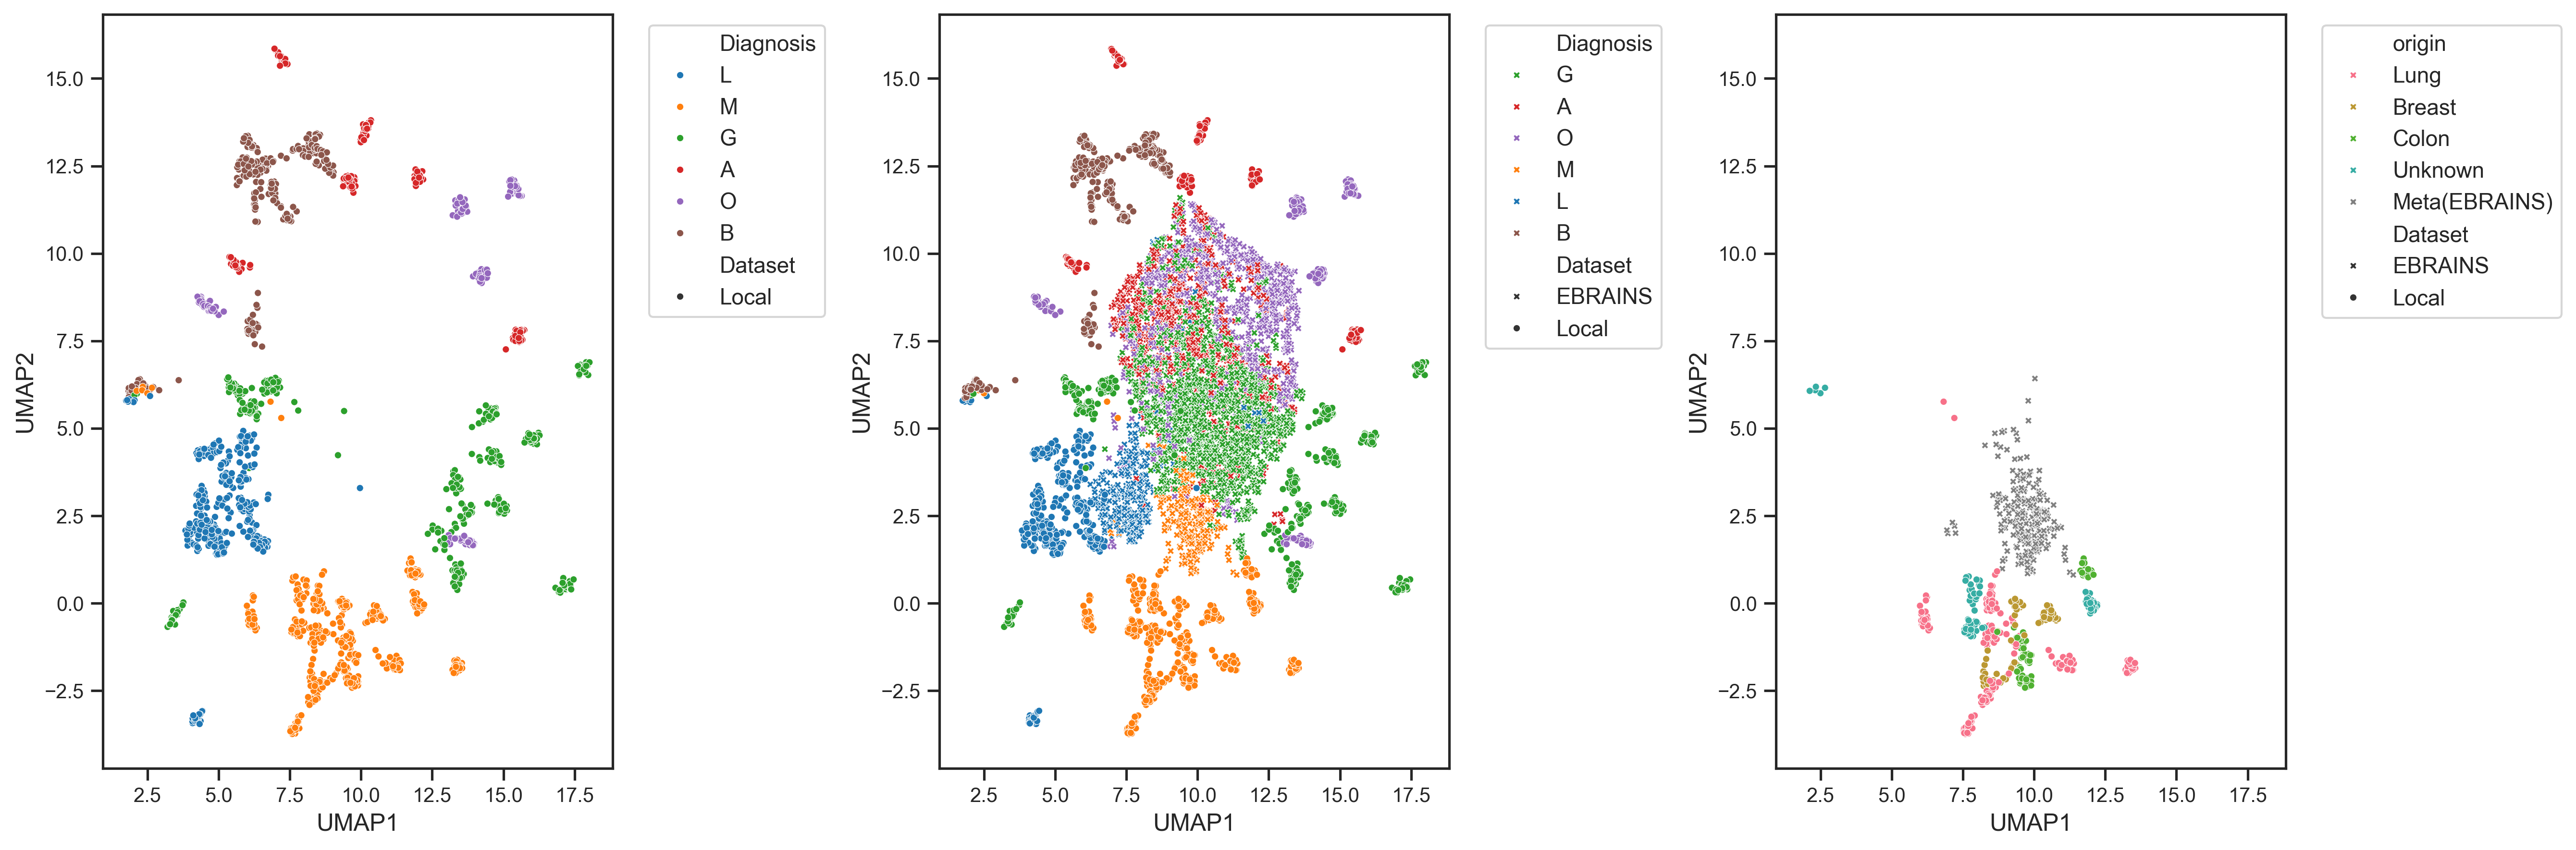

In [5]:
def cluster(path, mode='label', show_cv=False):
    df = pd.read_excel(path)
    # unique_codes = list(df['Diagnosis'].unique())
    unique_codes = list('LMGAOB')

    show_cv = True
    
    if mode == 'multi':
        if show_cv:
            fig = plt.figure(figsize=(18, 6))
            ax_cv = fig.add_subplot(1, 3, 1)
            ax_label = fig.add_subplot(1, 3, 2)
            ax_origin = fig.add_subplot(1, 3, 3)
        else:
            fig = plt.figure(figsize=(14, 6))
            ax_label = fig.add_subplot(1, 2, 1)
            ax_origin = fig.add_subplot(1, 2, 2)
    else:
        fig = plt.figure(figsize=(8, 6))
        ax_label = fig.add_subplot(1, 1, 1)
        ax_origin = ax_label

    if mode in ['label', 'multi']:
        g = sns.scatterplot(
            data=df[::-1],
            x='UMAP1', y='UMAP2',
            hue='Diagnosis',
            style='Dataset',  
            markers={'Local': 'o', 'EBRAINS': 'X'}, 
            hue_order=unique_codes,
            palette='tab10',
            s=12,
            # alpha=0.3,
            ax=ax_label,
        )
        handles, labels = ax_label.get_legend_handles_labels()
        order = [0, 3, 4, 5, 2, 1, 6, 7, 8, 9]
        ax_label.legend([handles[i] for i in order], [labels[i] for i in order], bbox_to_anchor=(1.05, 1), loc='upper left')
        if show_cv:
            g = sns.scatterplot(
                data=df[df['Dataset'] == 'Local'],
                x='UMAP1', y='UMAP2',
                hue='Diagnosis',
                style='Dataset',  
                markers={'Local': 'o'}, 
                hue_order=unique_codes,
                palette='tab10',
                s=12,
                # alpha=0.3,
                ax=ax_cv,
            )
            ax_cv.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            ax_cv.set_xlim(*ax_label.get_xlim())
            ax_cv.set_ylim(*ax_label.get_ylim())
    if mode in ['origin', 'multi']:
        origin_count = len(df['origin'].unique())
        pallete = list(sns.color_palette('husl'))[:origin_count-2]+['gray']
        g = sns.scatterplot(
            data=df[::-1],
            x='UMAP1', y='UMAP2',
            hue='origin',
            style='Dataset',  
            markers={'Local': 'o', 'EBRAINS': 'X'}, 
            hue_order=['Lung', 'Breast', 'Colon', 'Unknown', 'Meta(EBRAINS)'],
            palette=pallete,
            s=12,
            # alpha=0.7,
            ax=ax_origin,
        )
        ax_origin.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax_origin.set_xlim(*ax_label.get_xlim())
        ax_origin.set_ylim(*ax_label.get_ylim())
        
    plt.tight_layout()
    plt.show()

# UNI(LP)
cluster(
    'out/compare/LMGAOB/fold5_0/frozen_uni_500/integrated_umap_embeddings.xlsx',
    mode = 'multi',
)

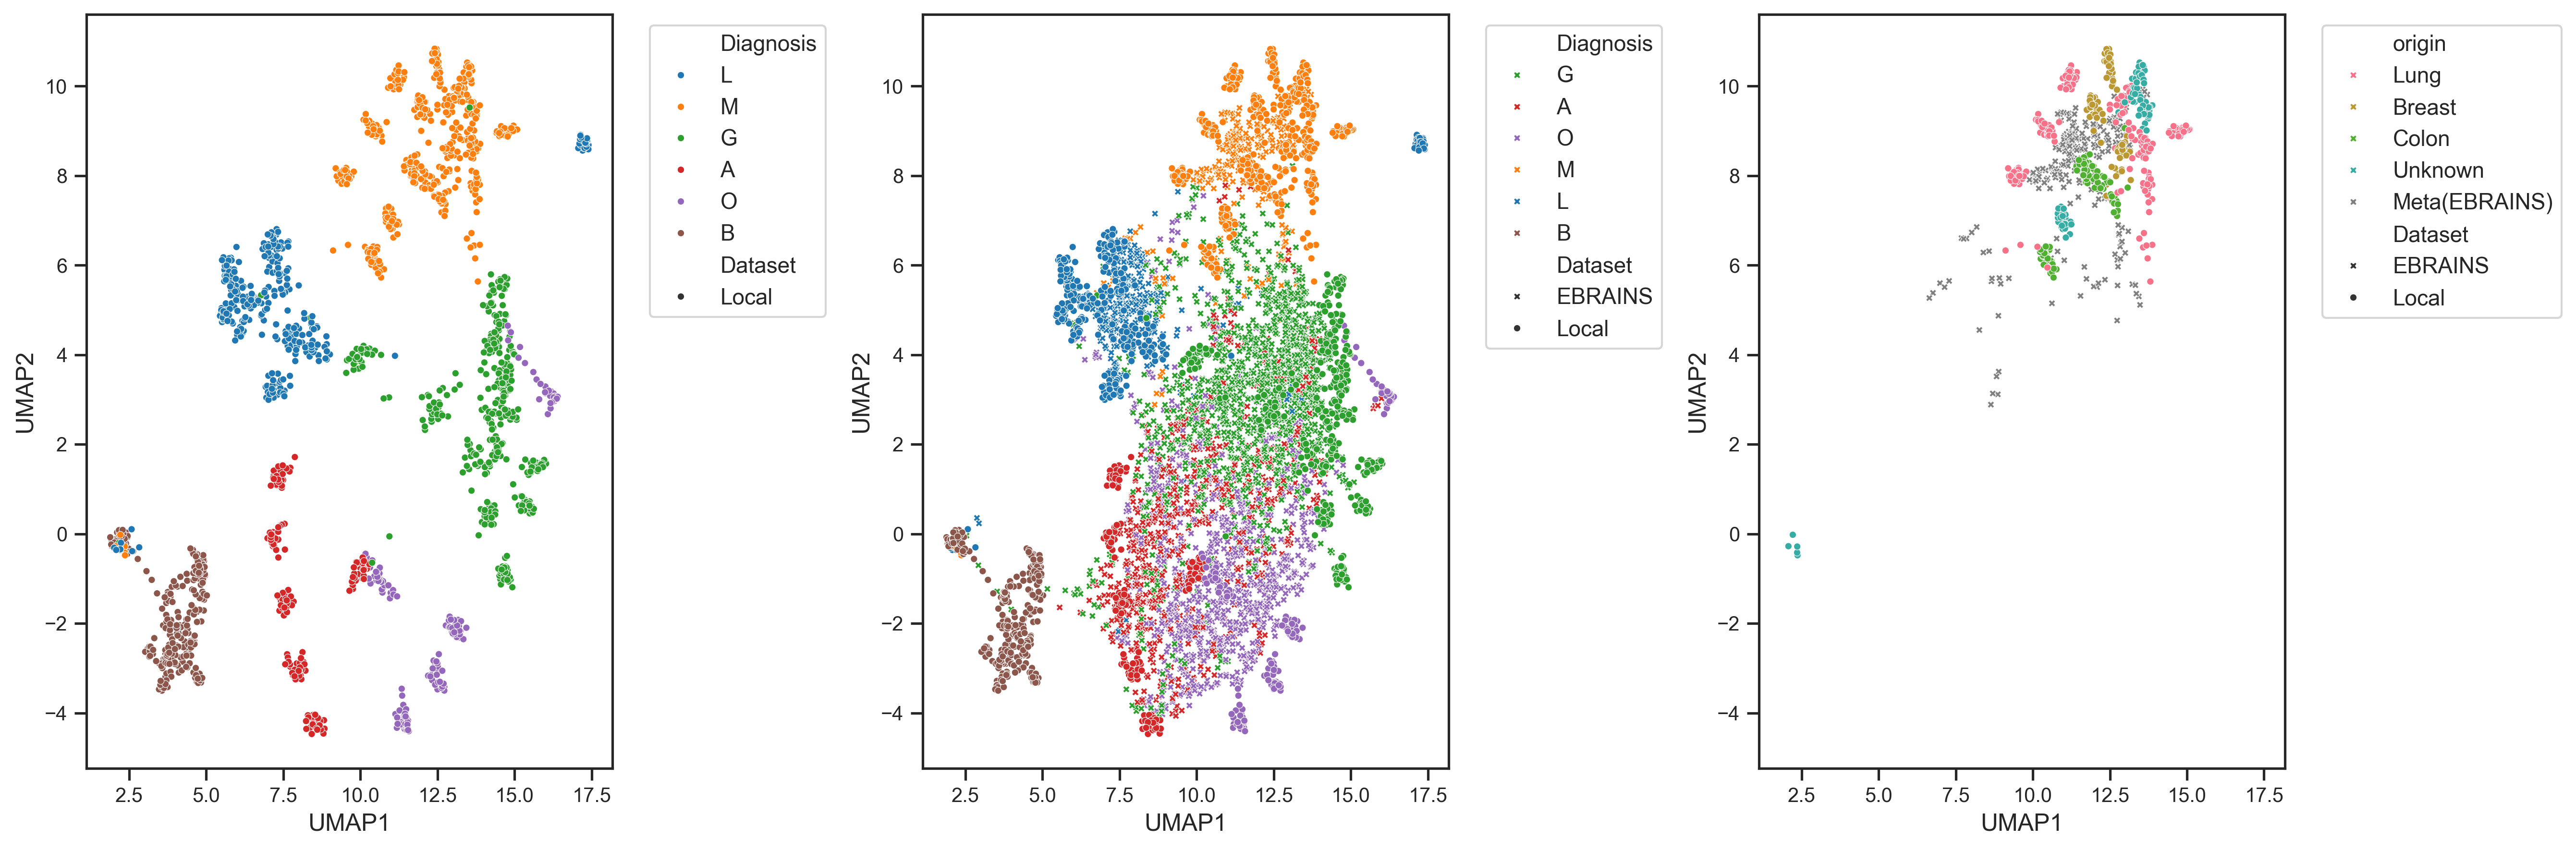

In [6]:
# UNI(LP)
cluster(
    'out/compare/LMGAOB/fold5_0/unfrozen_uni_500/integrated_umap_embeddings.xlsx',
    mode = 'multi',
)

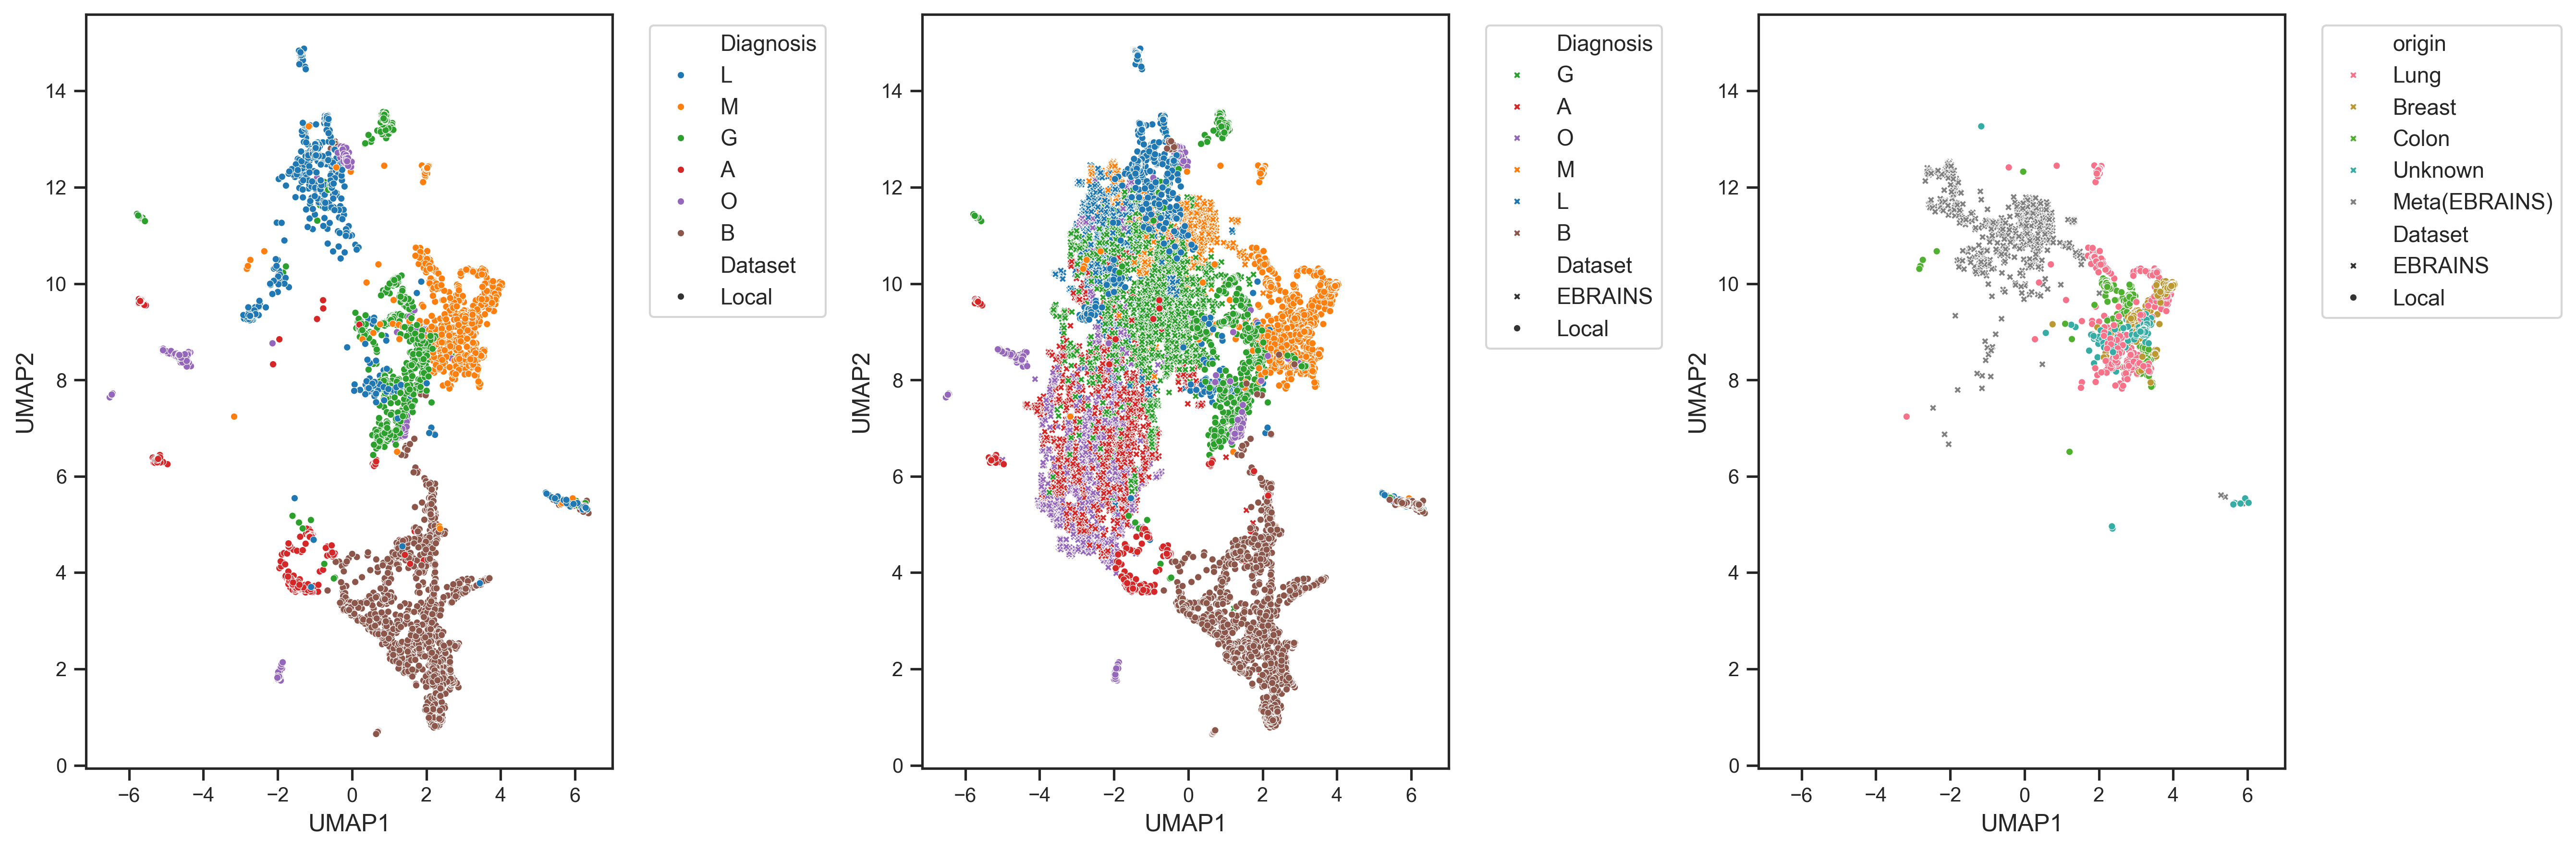

In [5]:
# VIT-L(FT)
cluster(
    'out/compare/LMGAOB/fold5_0/frozen_baseline-vit_500/integrated_umap_embeddings.xlsx',
    mode = 'multi',
)

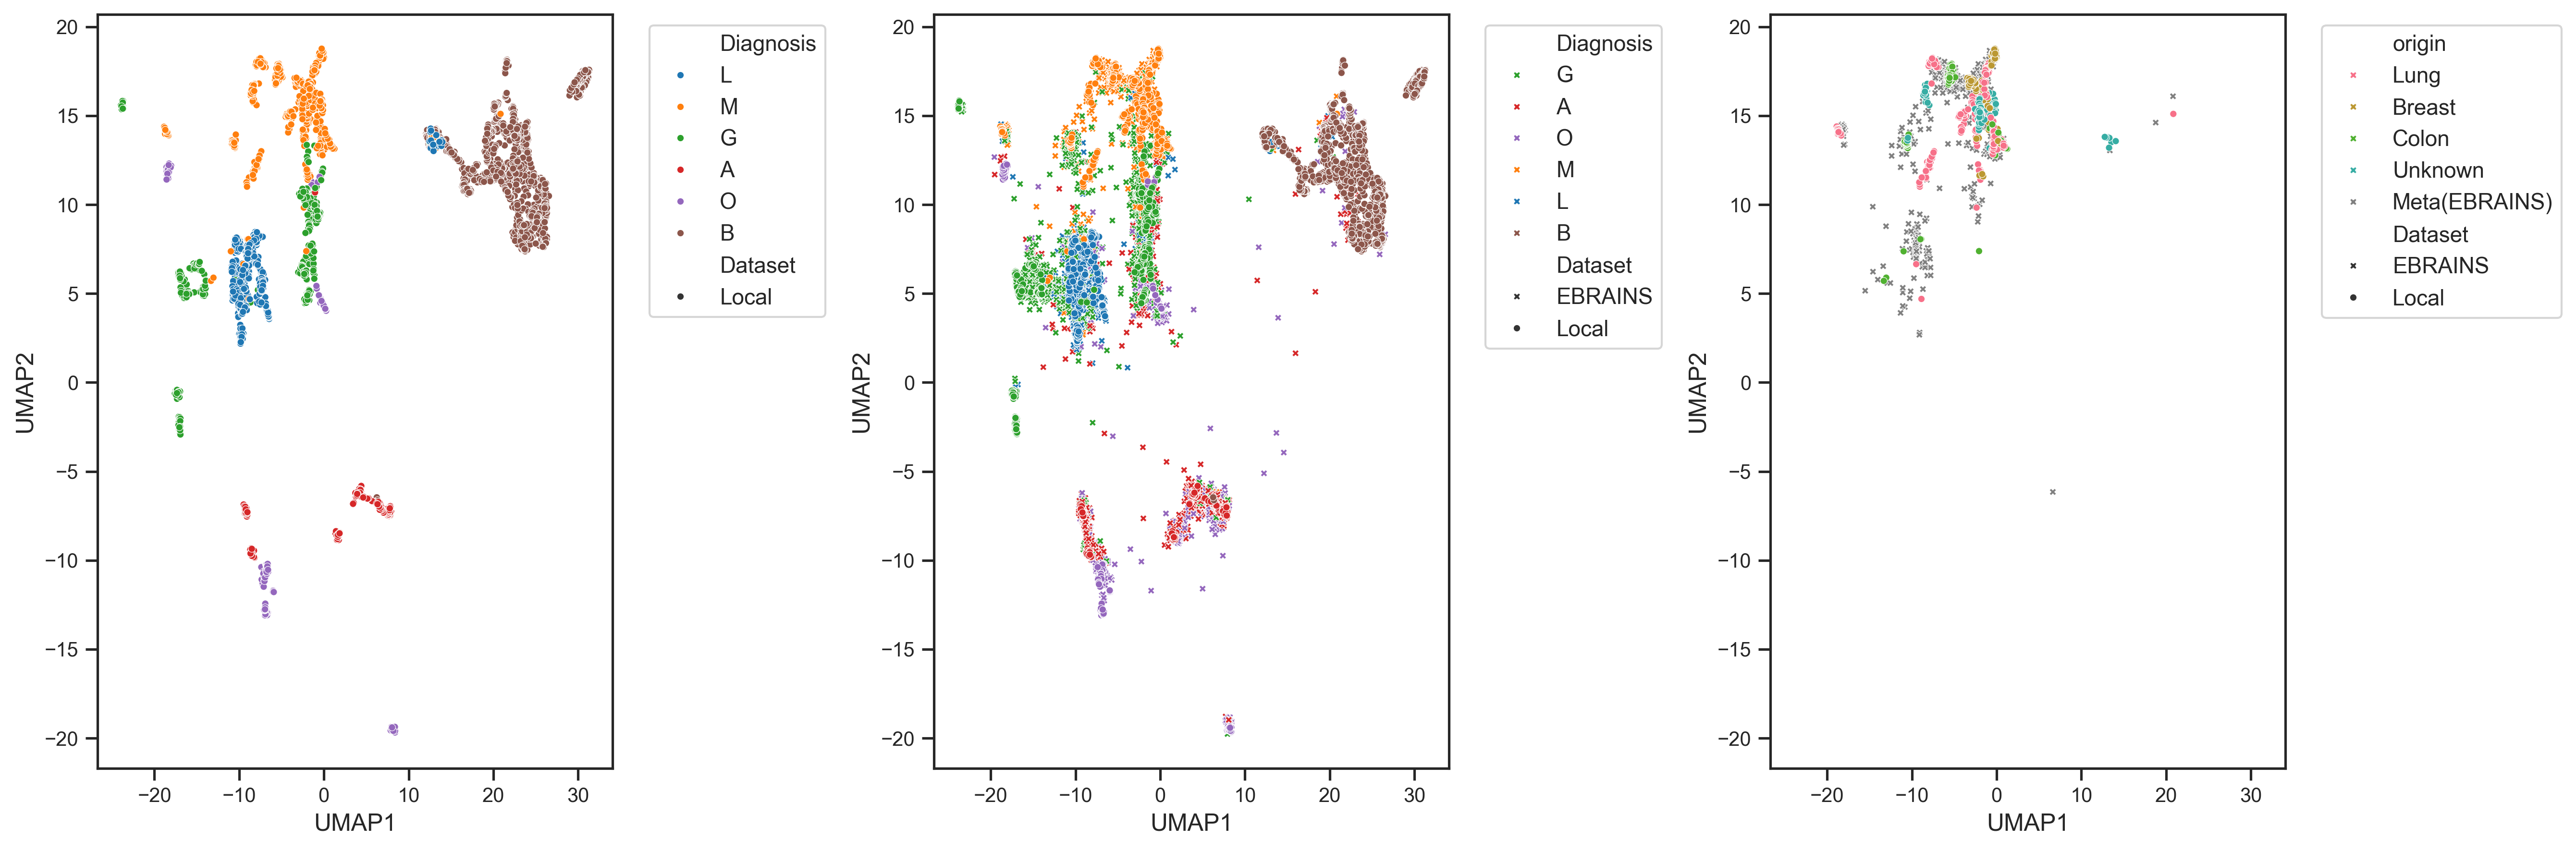

In [9]:
# VIT-L(FT)
cluster(
    'out/compare/LMGAOB/fold5_0/unfrozen_baseline-vit_500/integrated_umap_embeddings.xlsx',
    mode = 'multi',
)

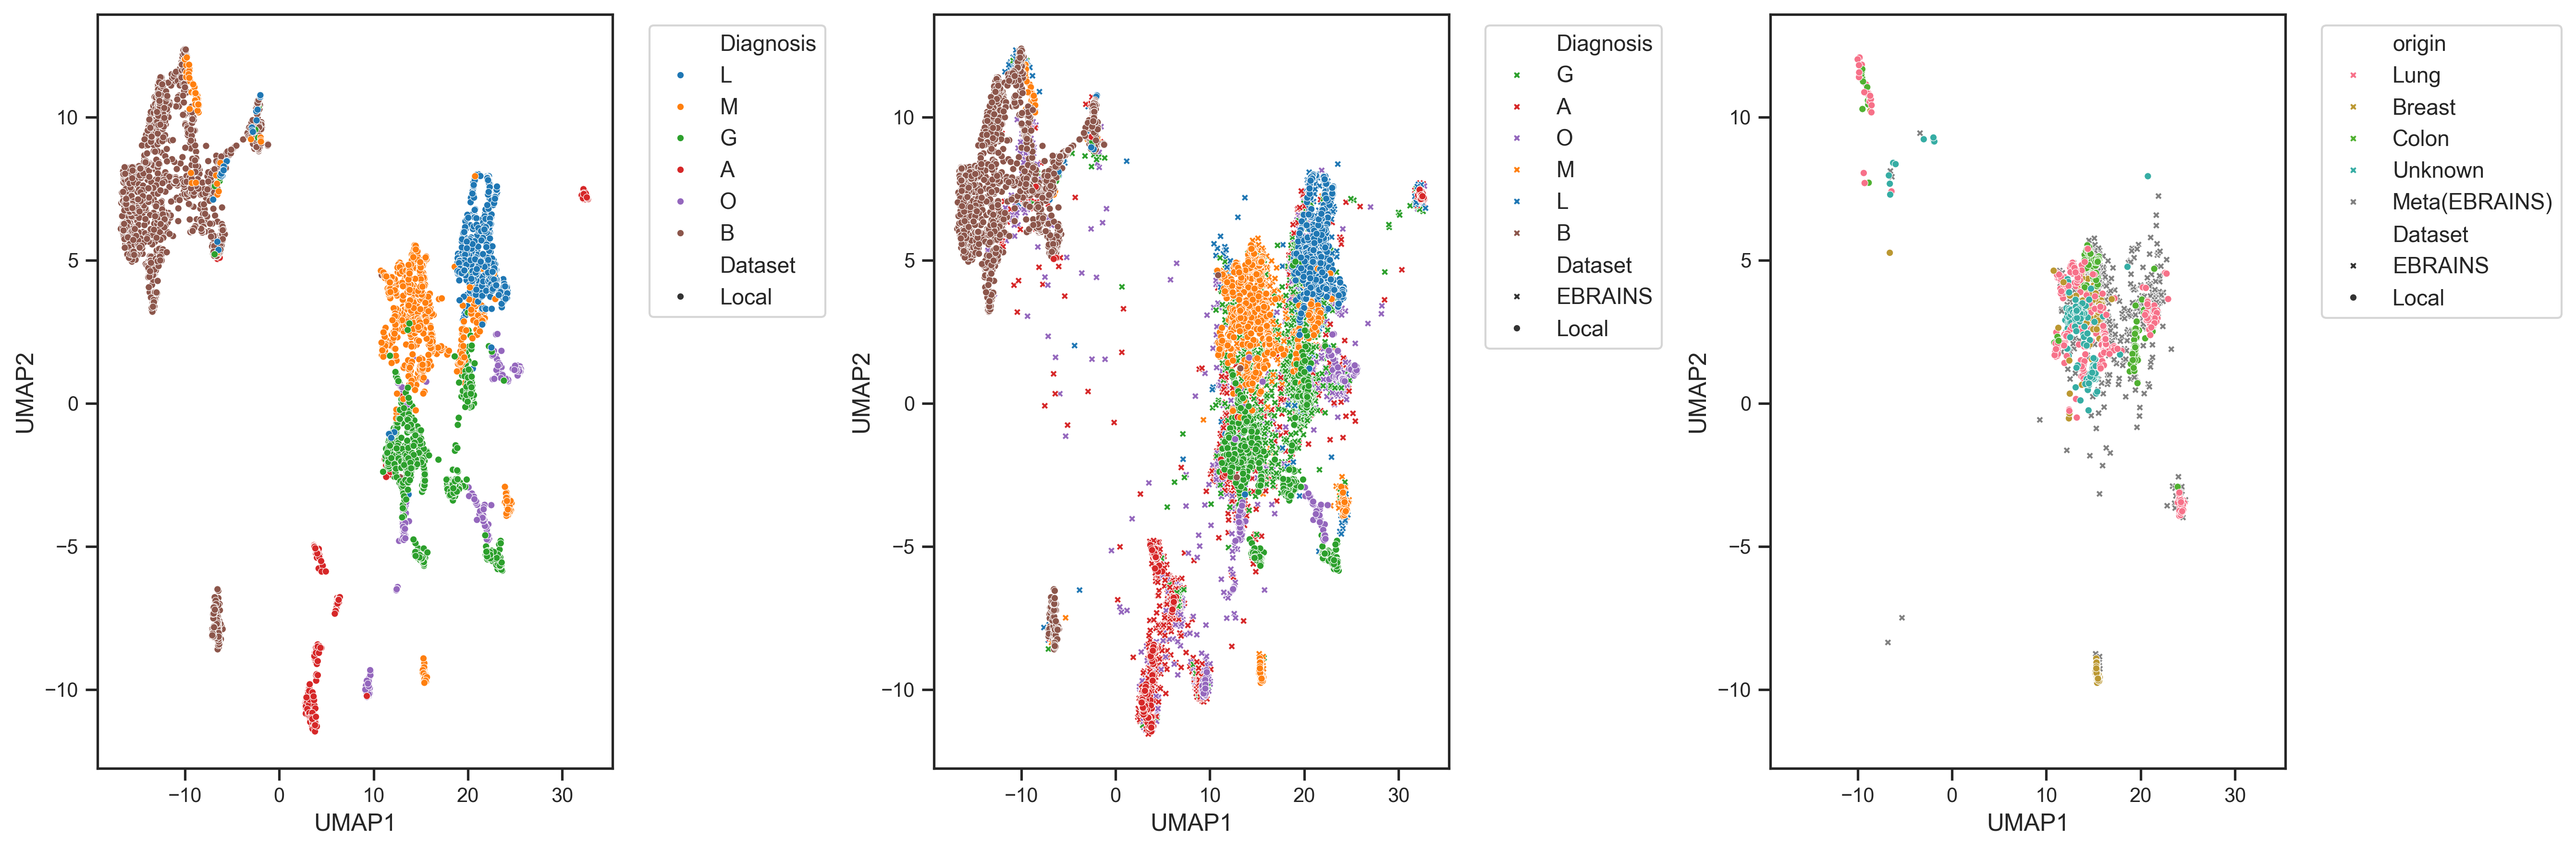

In [8]:
# VIT-L(RI)
cluster(
    'out/compare/LMGAOB/fold5_0/unfrozen_random-vit_500/integrated_umap_embeddings.xlsx',
    mode = 'multi',
)

In [ ]:
# VIT-L(RI)
cluster(
    'out/compare/LMGAOB/fold5_0/unfrozen_random-vit_500/integrated_umap_embeddings.xlsx',
    mode = 'multi',
)